**Table of Contents:**

>[About task:](#scrollTo=oSBwWw4nMP2I)

>[1 Layer System](#scrollTo=OCKXagzwNBHk)

>>[Performance metrics](#scrollTo=AxguAOHYmwwb)

>>[User Input and Prediction](#scrollTo=KMxrHsXtgJW9)

>[4 Layer System](#scrollTo=ZXXoEWgwG-1i)

>>[Performance metrics](#scrollTo=Hmq8qzMApSE_)

>[References](#scrollTo=8JERRbBw73uY)



# About task:
The goal of this subtask is to develop your own
model and use it to learn the sine function on the interval $[0, 2π]$. Discretize the interval with a suitable number of points (of your choice) and use the values of the sine function at these discretization points as labels.
Implement a Quantum Machine Learning model which reproduces the values of the sine function.

***Solution:*** A regression model using QML will be designed and implemented.

***Approach:***
- **Data Generation:** First, 100 data points will be generated from the sine function, $y=sin(x),x∈[0,2π]$. From there, 30% of the data will be randomly chosen for testing, and the model will be trained using 70% of the generated data.

- **QML Model:** The data will be encoded using angle embedding.
    - First, a 1 layer of rotation gates will be chosen as the ansatze. The model will be trained using only the training data. The qubit will be measured to get the expectation value as prediction for testing data.
    - 4 layers of rotation gates will be chosen as the ansatze, and the same operation will be performed.

- **Cost function and Optimization:** A cost function will be implemented to estimate the cost of the QML model. A Gradient Descent Optimizer will be used to optimize/minimize the cost.
- **Result & Discussion:** The training and prediction data will be plotted, and the two models will be compared. The mae, mse, and rmse scores between the two models will also be compared.

In [ ]:
! pip install pennylane -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.4 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


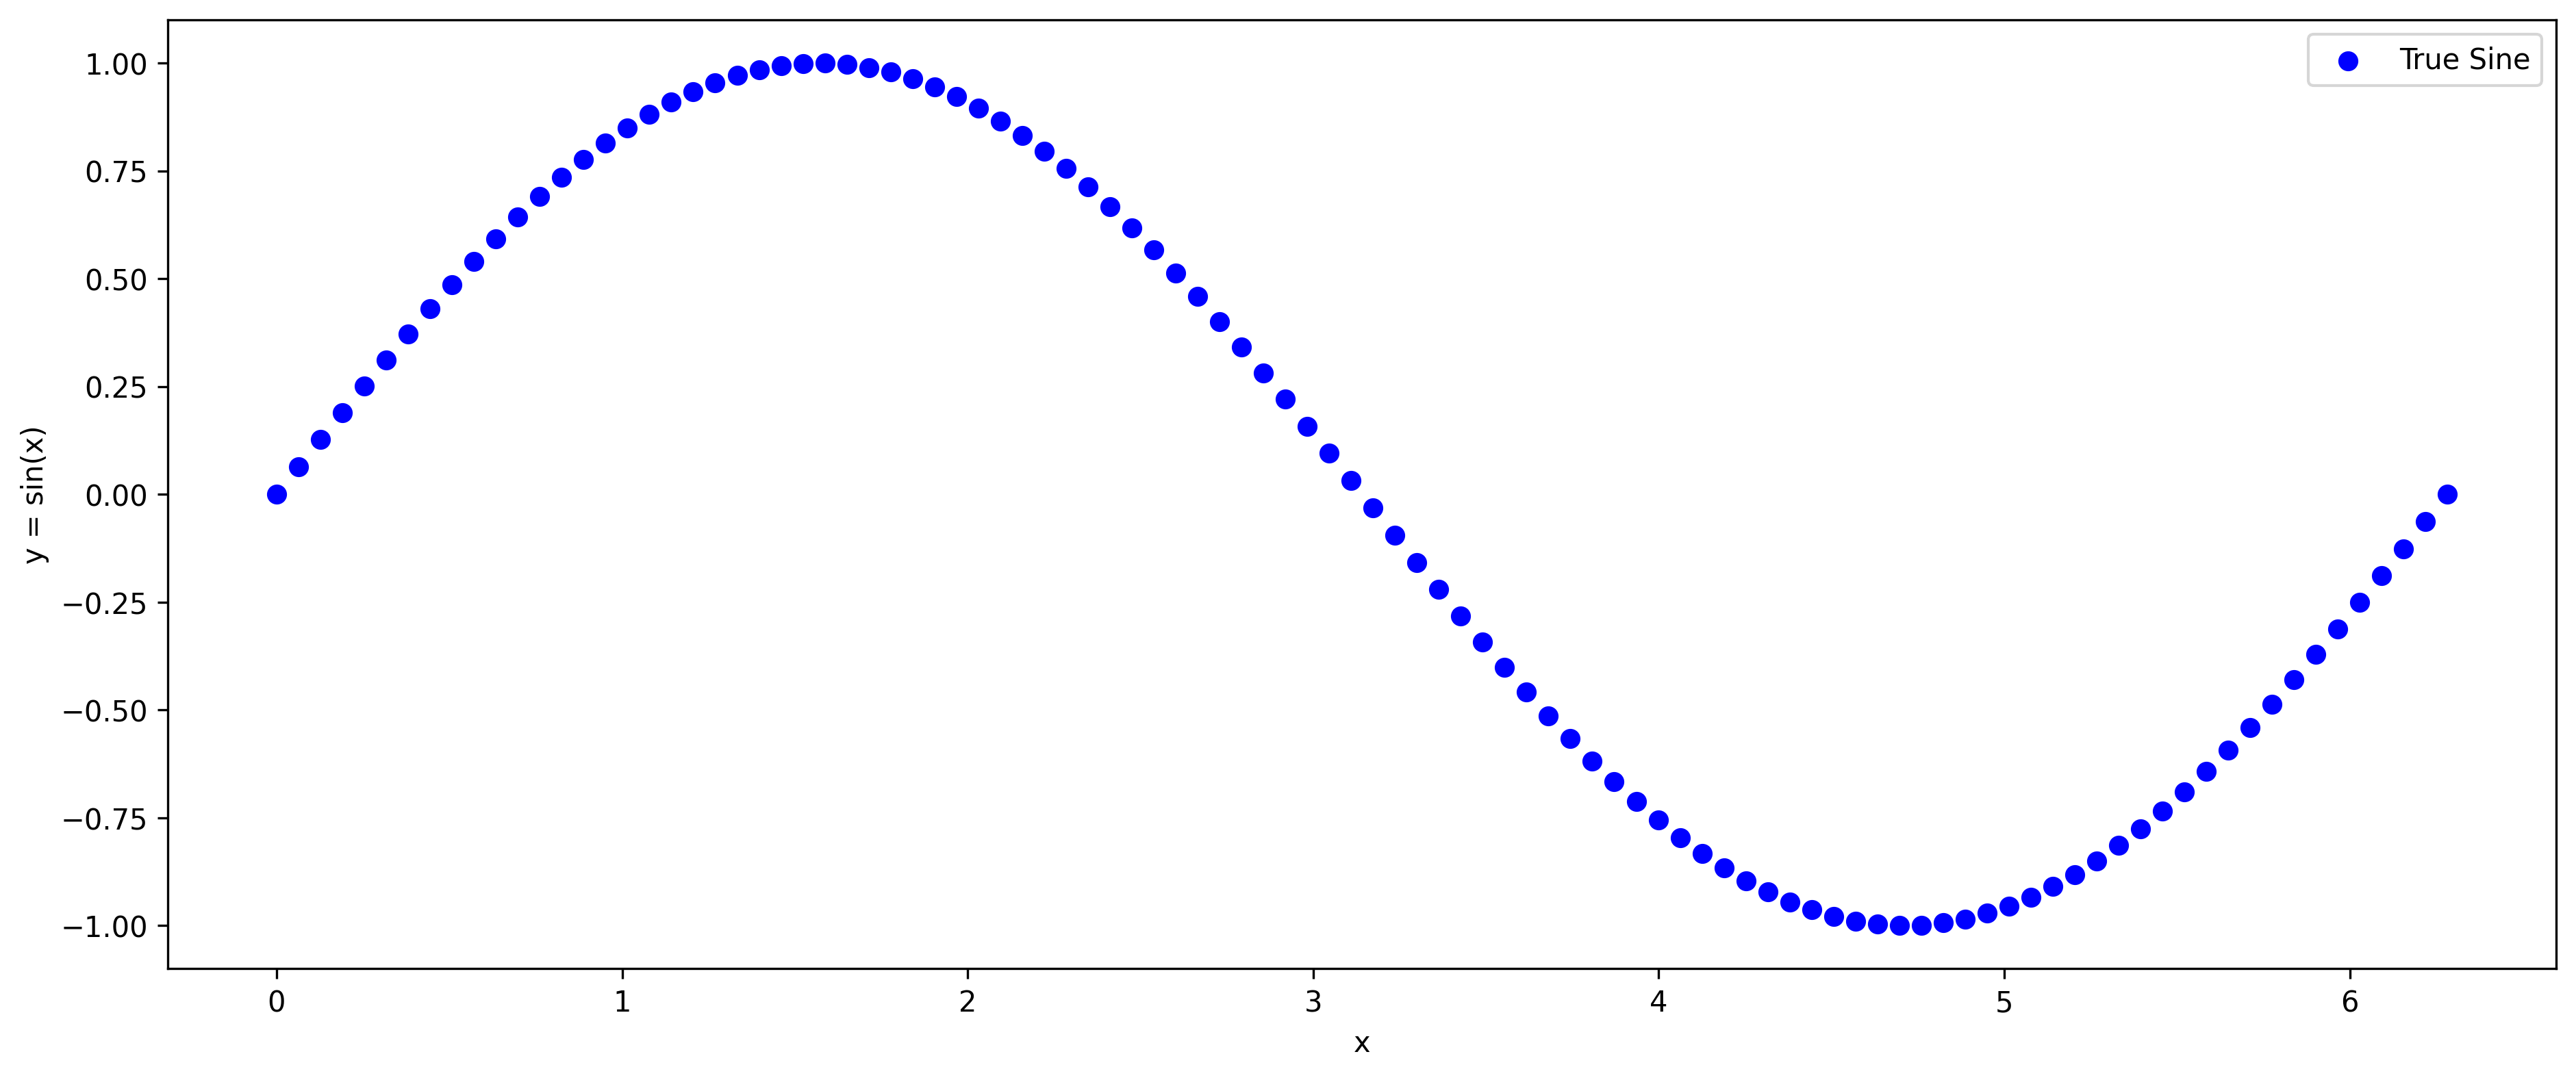

In [ ]:
# Discretize the interval [0, 2π] into 100 points
X = np.linspace(0, 2 * np.pi, 100)
Y = np.sin(X)


# Plot the sine function
plt.figure(figsize = (15, 6), dpi = 300)
plt.scatter(X, Y, c='b', label='True Sine')
plt.xlabel('x')
plt.ylabel('y = sin(x)')
plt.legend()
plt.show()


In [ ]:
# Split into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=92)

# 1 Layer System

In [ ]:
# Define a 1-qubit quantum device
dev = qml.device('default.qubit', wires=1)

num_layers = 1

# Define a simple Quantum Circuit
@qml.qnode(dev)
def q_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=[0])
    for i in range(num_layers):
        qml.Rot(weights[0], weights[1], weights[2], wires=0)
    return qml.expval(qml.PauliZ(wires = [0]))

# Initialize weights
weights = np.array([0.1, 0.1, 0.1], requires_grad=True)

In [ ]:
print(qml.draw(q_circuit, expansion_strategy="device")([0], weights))

0: ──RX(0.00)──Rot(0.10,0.10,0.10)─┤  <Z>


In [ ]:
# Define the cost function, it returns loss
def cost(weights, x, y):
    predictions = np.array([q_circuit([j], weights) for j in x])
    return np.mean((predictions - y) ** 2)

In [ ]:
cost_1l = {}
# Set up the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Training
steps = 100
for i in range(steps):
    weights, pre_cost = opt.step_and_cost(lambda w: cost(w, X_train, Y_train), weights)
    if (i + 1) % 10 == 0:
        print(f"Step {i + 1}/{steps}: cost = {pre_cost}")
        cost_1l[i + 1] = pre_cost

# Make predictions
predictions = np.array([q_circuit([j], weights) for j in X_test])

Step 10/100: cost = 0.9971877442075363
Step 20/100: cost = 0.7831583589098774
Step 30/100: cost = 0.17786667287474028
Step 40/100: cost = 0.03344998343894415
Step 50/100: cost = 0.01336792293569477
Step 60/100: cost = 0.007630401270496477
Step 70/100: cost = 0.005000025519953011
Step 80/100: cost = 0.003530435535988682
Step 90/100: cost = 0.0026223028541014154
Step 100/100: cost = 0.002022482627885586


## Performance metrics

In [ ]:
mae = mean_absolute_error(Y_test,predictions)
mse = mean_squared_error(Y_test,predictions)
rmse = mean_squared_error(Y_test,predictions) ** 0.5

metrics_1l = {'mae': mae, 'mse': mse, 'rmse': rmse}


print(f"Mean Absolute Error(MAE): {mae:0.5f}")
print(f"Mean Squared Error(MSE): {mse:0.5f}")
print(f"Root Mean Squared Error(RMSE): {rmse:0.5f}")


Mean Absolute Error(MAE): 0.04078
Mean Squared Error(MSE): 0.00215
Root Mean Squared Error(RMSE): 0.04635


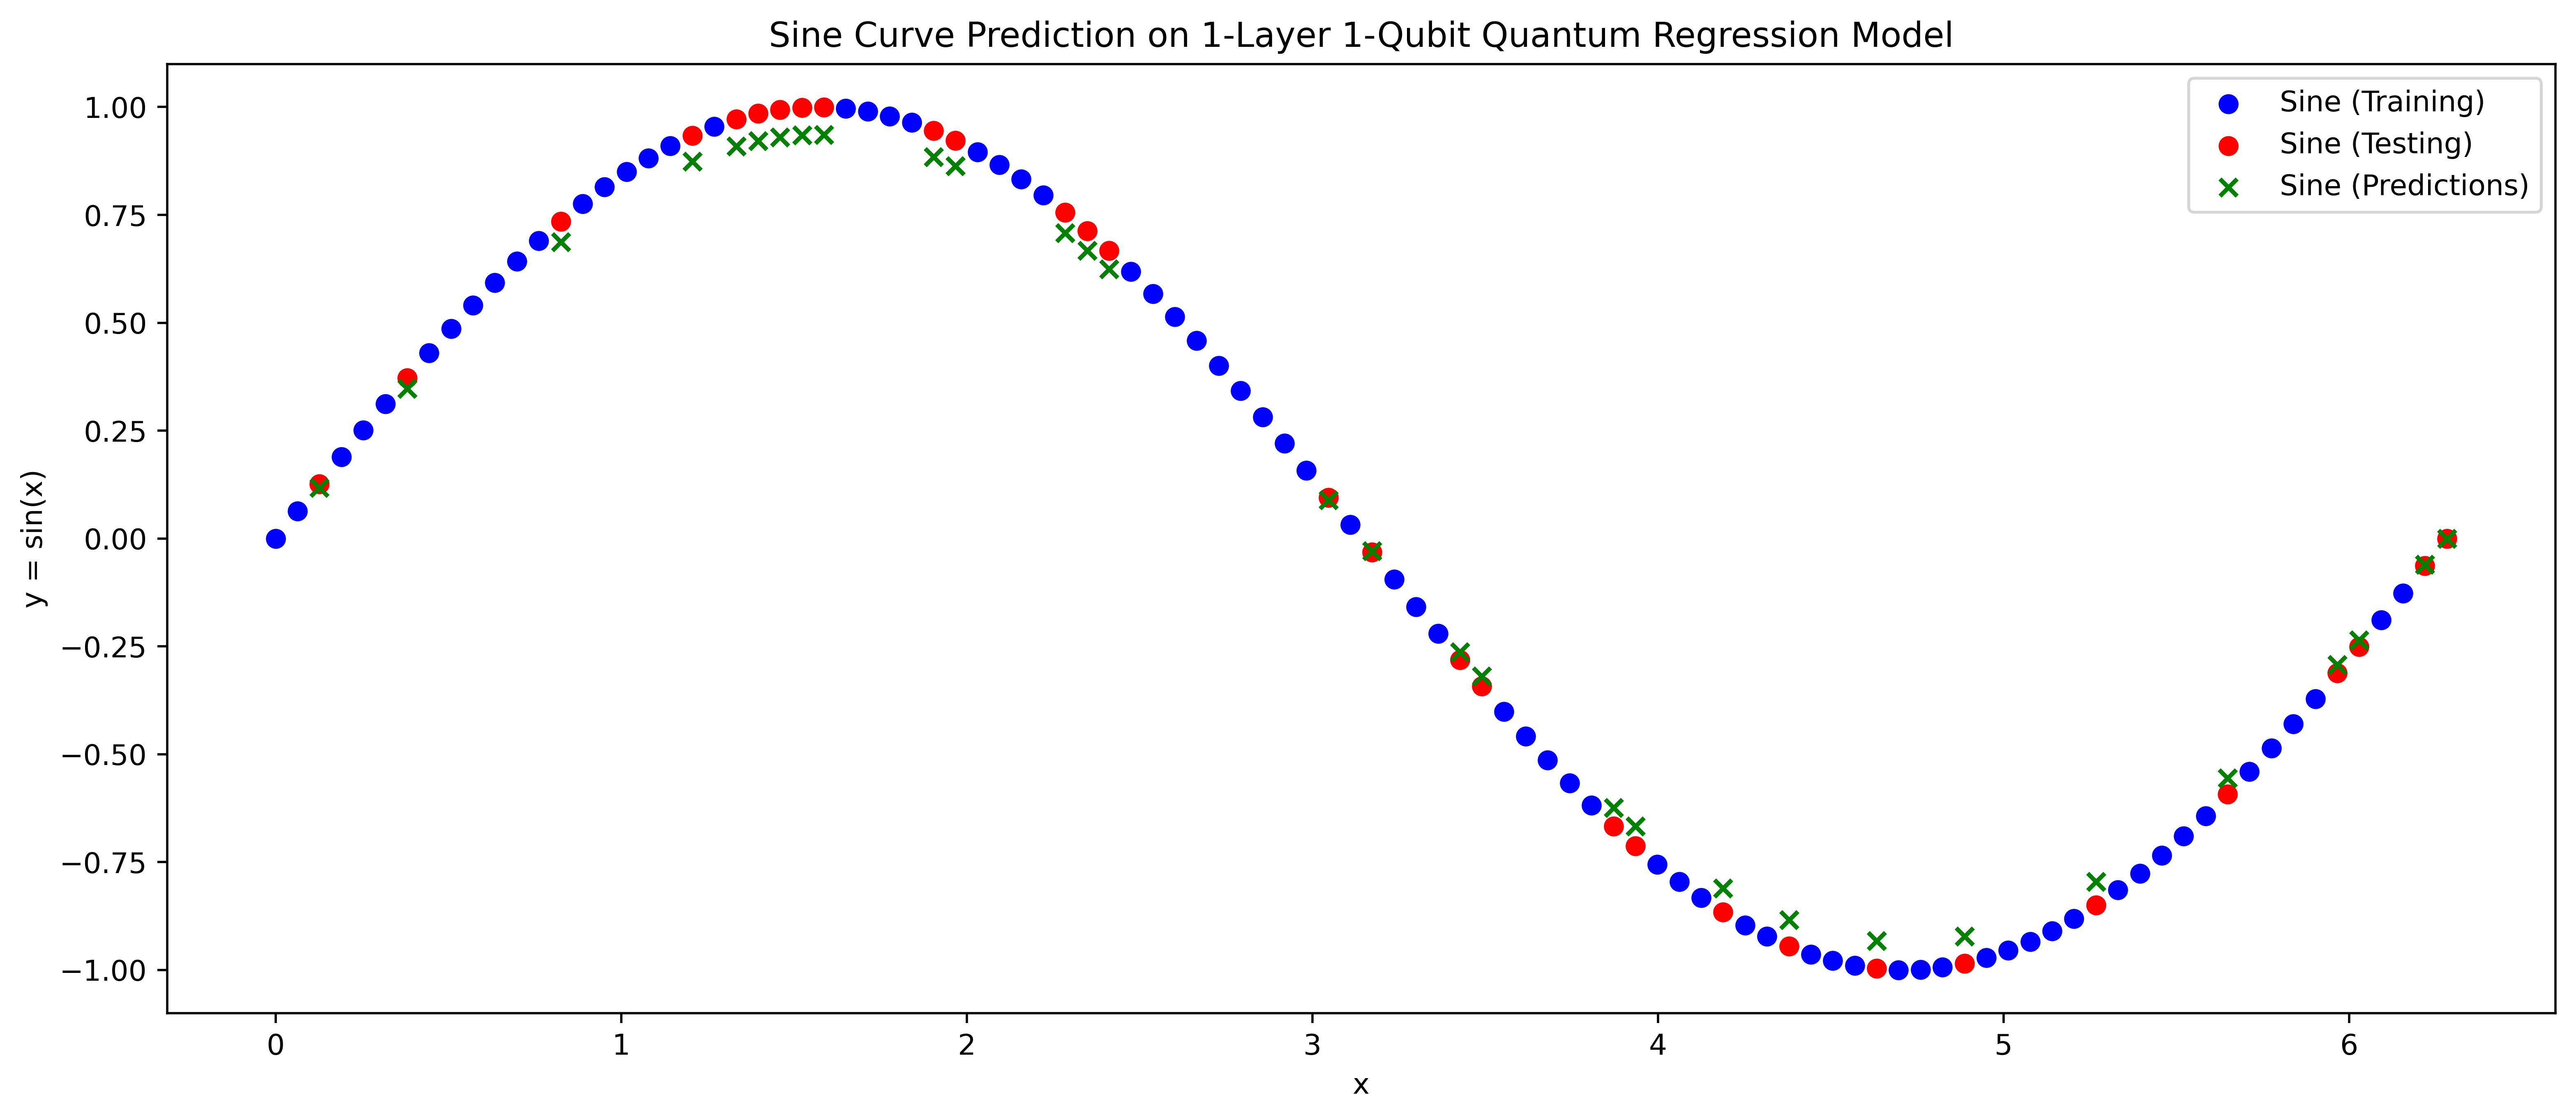

In [ ]:
# Plotting results
plt.figure(figsize = (15, 6), dpi = 500)
plt.scatter(X_train, Y_train, color='blue', label='Sine (Training)')
plt.scatter(X_test, Y_test, color='red', label='Sine (Testing)')
plt.scatter(X_test, predictions, color='green', label='Sine (Predictions)', marker='x')
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.title("Sine Curve Prediction on 1-Layer 1-Qubit Quantum Regression Model")
plt.legend()
plt.show()

## User Input and Prediction

In [ ]:
user_in = input("Input a value (from 0 to 2): ")

# multiply a pi
user_X = np.pi * int(user_in)
user_Y = np.sin(user_X)
user_pred = q_circuit([user_X], weights)

print(f"User input: {user_X}, Actual output: {user_Y}, Predicted output: {user_pred:.5f}, Error: {(user_Y - user_pred)**2:.5f}")

Input a value (from 0 to 2): 2
User input: 6.283185307179586, Actual output: -2.4492935982947064e-16, Predicted output: -0.00056, Error: 0.00000


# 4 Layer System

In [ ]:
# Define a 1-qubit quantum device
dev = qml.device('default.qubit', wires=1)

num_layers = 4
# Define a simple Quantum Circuit
@qml.qnode(dev)
def qc_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=[0])
    for i in range(num_layers):
        qml.Rot(weights[0], weights[1], weights[2], wires=0)
    return qml.expval(qml.PauliZ(0))

# Initialize weights
weights = np.array([0.1, 0.1, 0.1], requires_grad=True)

In [ ]:
print(qml.draw(qc_circuit, expansion_strategy="device")([0], weights))


0: ──RX(0.00)──Rot(0.10,0.10,0.10)──Rot(0.10,0.10,0.10)──Rot(0.10,0.10,0.10)──Rot(0.10,0.10,0.10)─┤

   <Z>


In [ ]:
# cost function
def cost(weights, x, y):
    predictions = np.array([qc_circuit([j], weights) for j in x])
    return np.mean((predictions - y) ** 2)

In [ ]:
cost_4l = {}
# Set up the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Training
steps = 100
for i in range(steps):
    weights, pre_cost = opt.step_and_cost(lambda w: cost(w, X_train, Y_train), weights)
    if (i + 1) % 10 == 0:
        print(f"Step {i + 1}/{steps}: cost = {pre_cost}")
        cost_4l[i + 1] = pre_cost * 100

# Make predictions
predictions = np.array([qc_circuit([j], weights) for j in X_test])

Step 10/100: cost = 0.0009980147141293802
Step 20/100: cost = 0.00021353457433564917
Step 30/100: cost = 9.245215579101923e-05
Step 40/100: cost = 5.1725690523952766e-05
Step 50/100: cost = 3.3118640530132004e-05
Step 60/100: cost = 2.3053778808548994e-05
Step 70/100: cost = 1.6988906917586434e-05
Step 80/100: cost = 1.3048690529508124e-05
Step 90/100: cost = 1.0342527965684742e-05
Step 100/100: cost = 8.402708781672504e-06


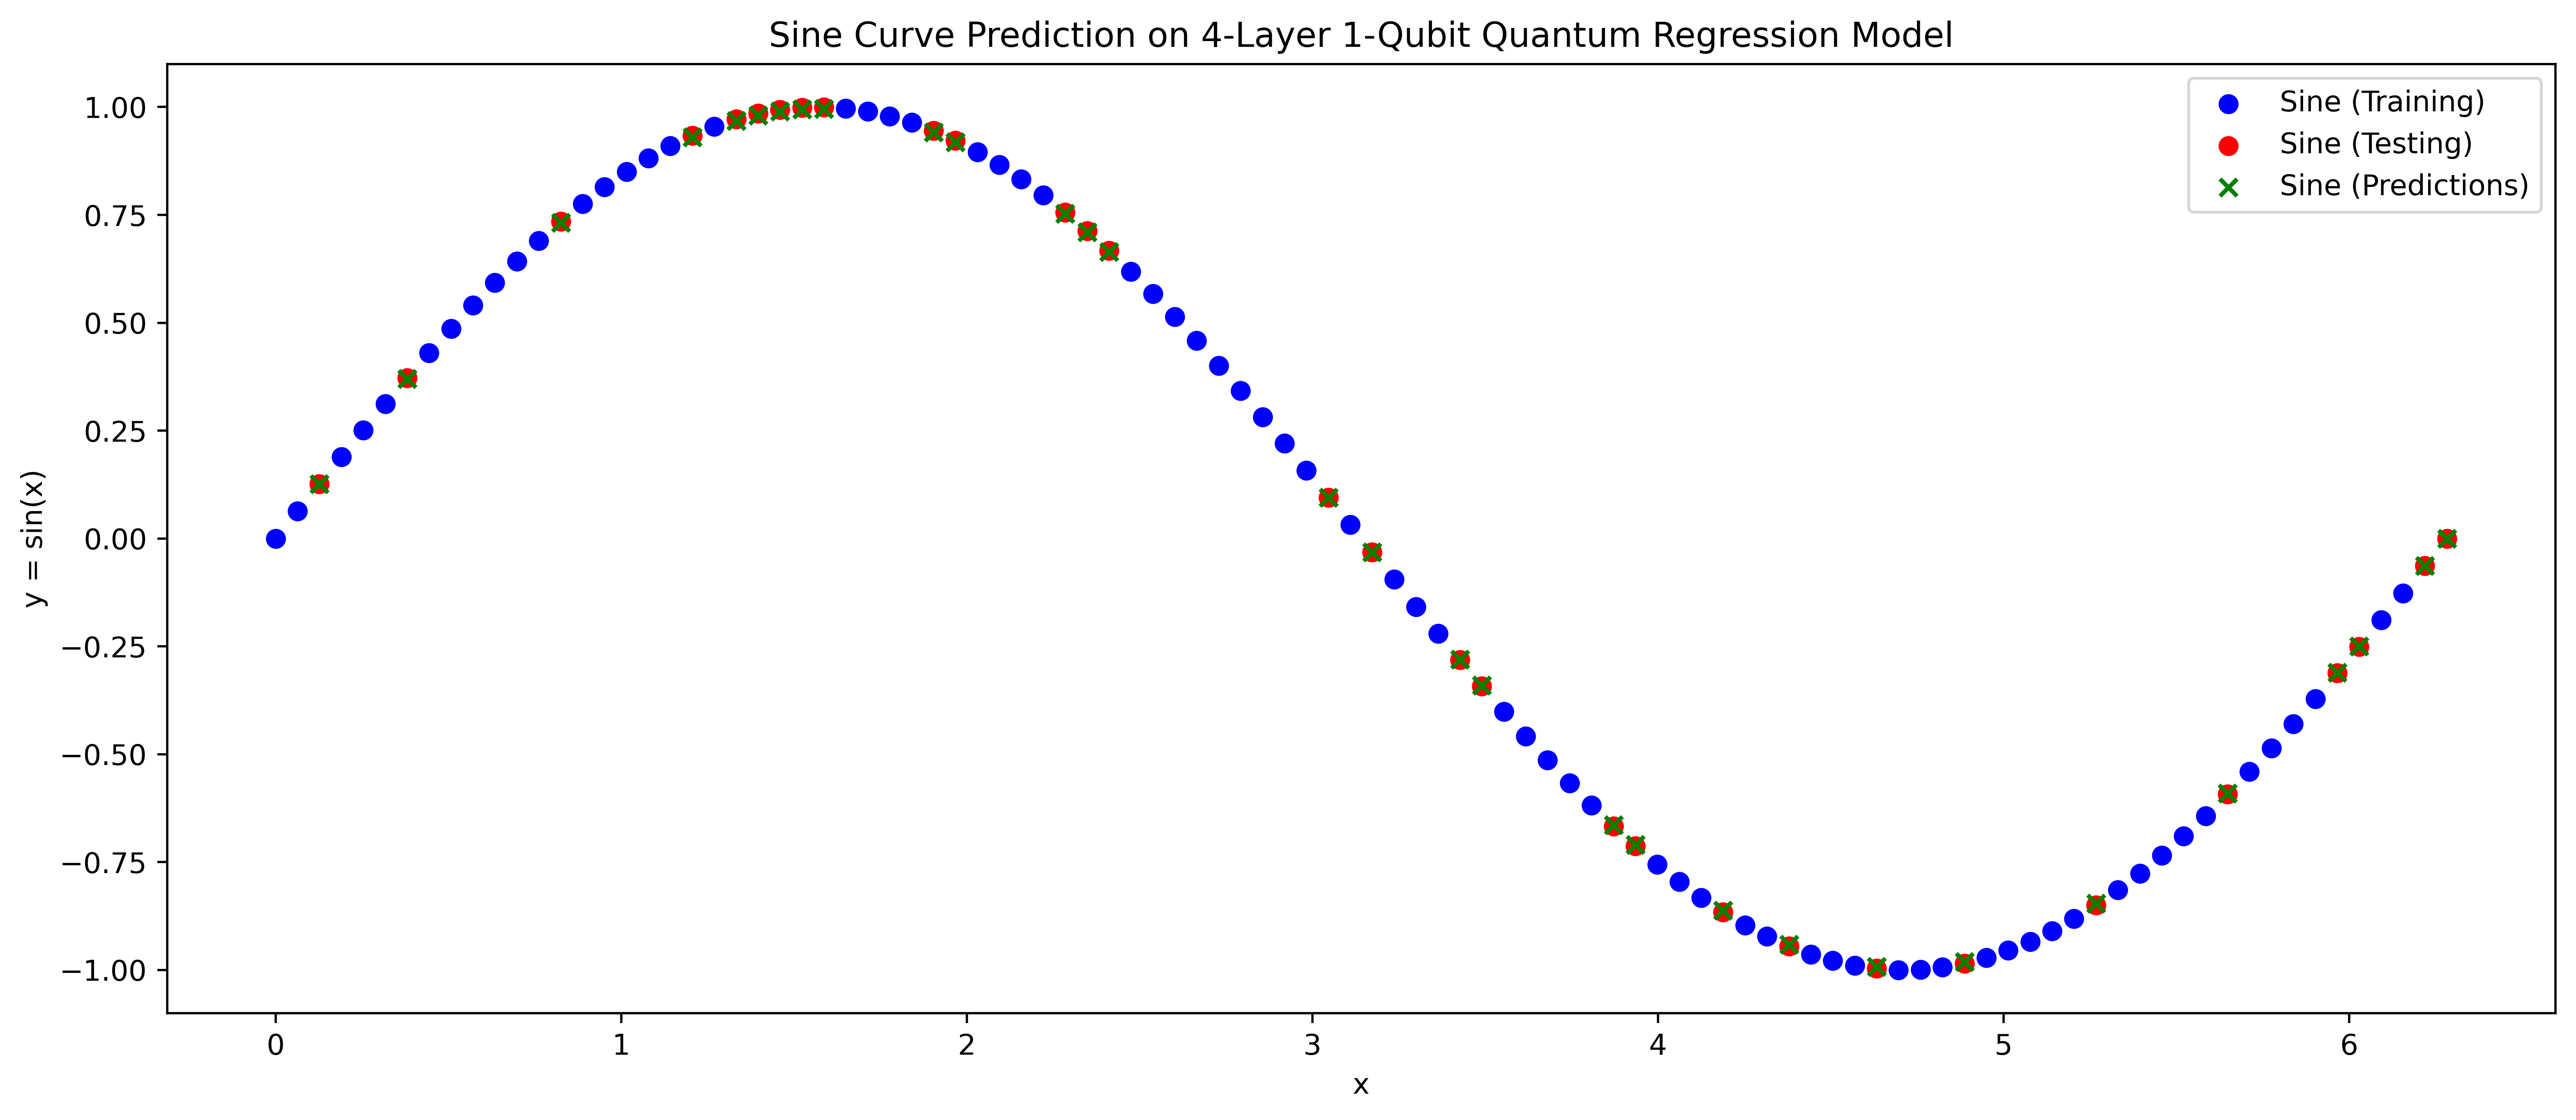

In [ ]:
# Plotting results
plt.figure(figsize = (15, 6), dpi = 500)
plt.scatter(X_train, Y_train, color='blue', label='Sine (Training)')
plt.scatter(X_test, Y_test, color='red', label='Sine (Testing)')
plt.scatter(X_test, predictions, color='green', label='Sine (Predictions)', marker='x')
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.title("Sine Curve Prediction on 4-Layer 1-Qubit Quantum Regression Model")
plt.legend()
plt.show()

## Performance metrics

In [ ]:
mae = mean_absolute_error(Y_test,predictions)
mse = mean_squared_error(Y_test,predictions)
rmse = mean_squared_error(Y_test,predictions) ** 0.5

metrics_4l = {'mae': mae, 'mse': mse, 'rmse': rmse}


print(f"Mean Absolute Error(MAE): {mae:0.5f}")
print(f"Mean Squared Error(MSE): {mse:0.5f}")
print(f"Root Mean Squared Error(RMSE): {rmse:0.5f}")


Mean Absolute Error(MAE): 0.00263
Mean Squared Error(MSE): 0.00001
Root Mean Squared Error(RMSE): 0.00299


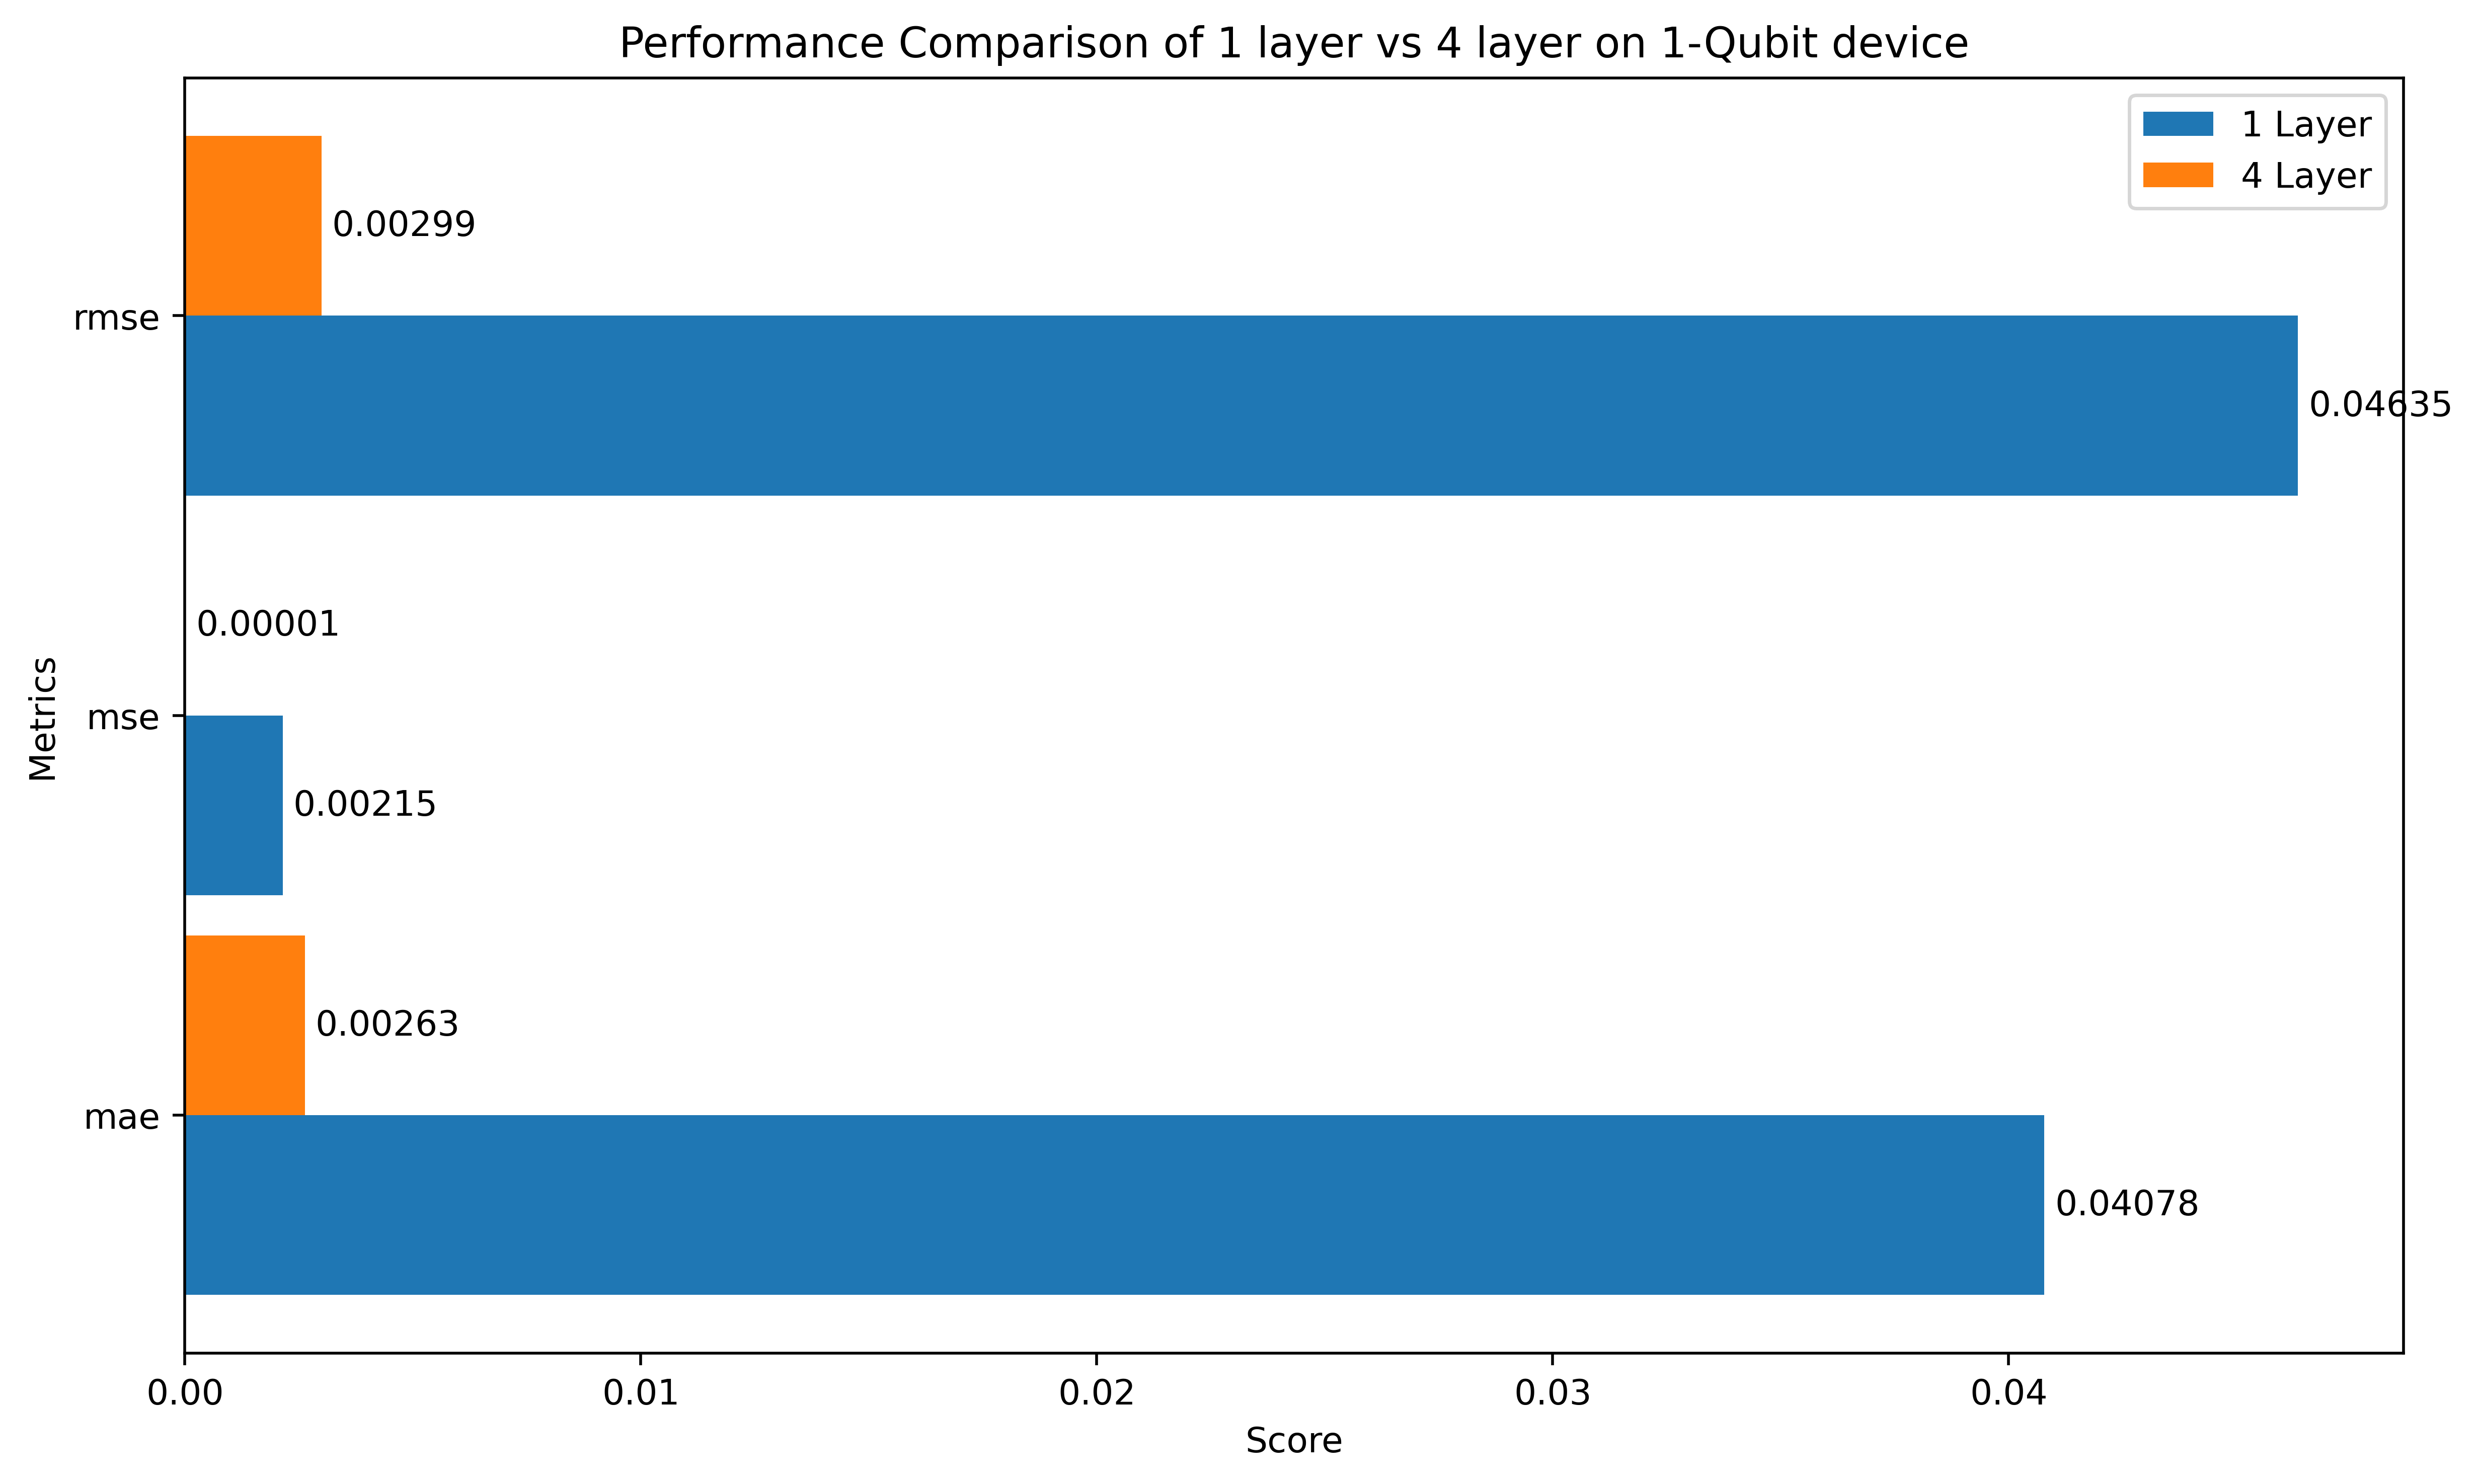

In [ ]:
labels = list(metrics_4l.keys())
y = np.arange(len(labels))
height = 0.45

fig, ax = plt.subplots(figsize=(10, 6), dpi = 500)
bars1 = ax.barh(y - height/2, list(metrics_1l.values()), height, label='1 Layer')
bars2 = ax.barh(y + height/2, list(metrics_4l.values()), height, label='4 Layer')

ax.set_xlabel('Score')
ax.set_ylabel('Metrics')
ax.set_title('Performance Comparison of 1 layer vs 4 layer on 1-Qubit device')

ax.set_yticks(y)
ax.set_yticklabels(labels)

ax.legend()

# Function to add value labels
def autolabel(bars):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.5f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

Error is significantly lower in 4 layer system.

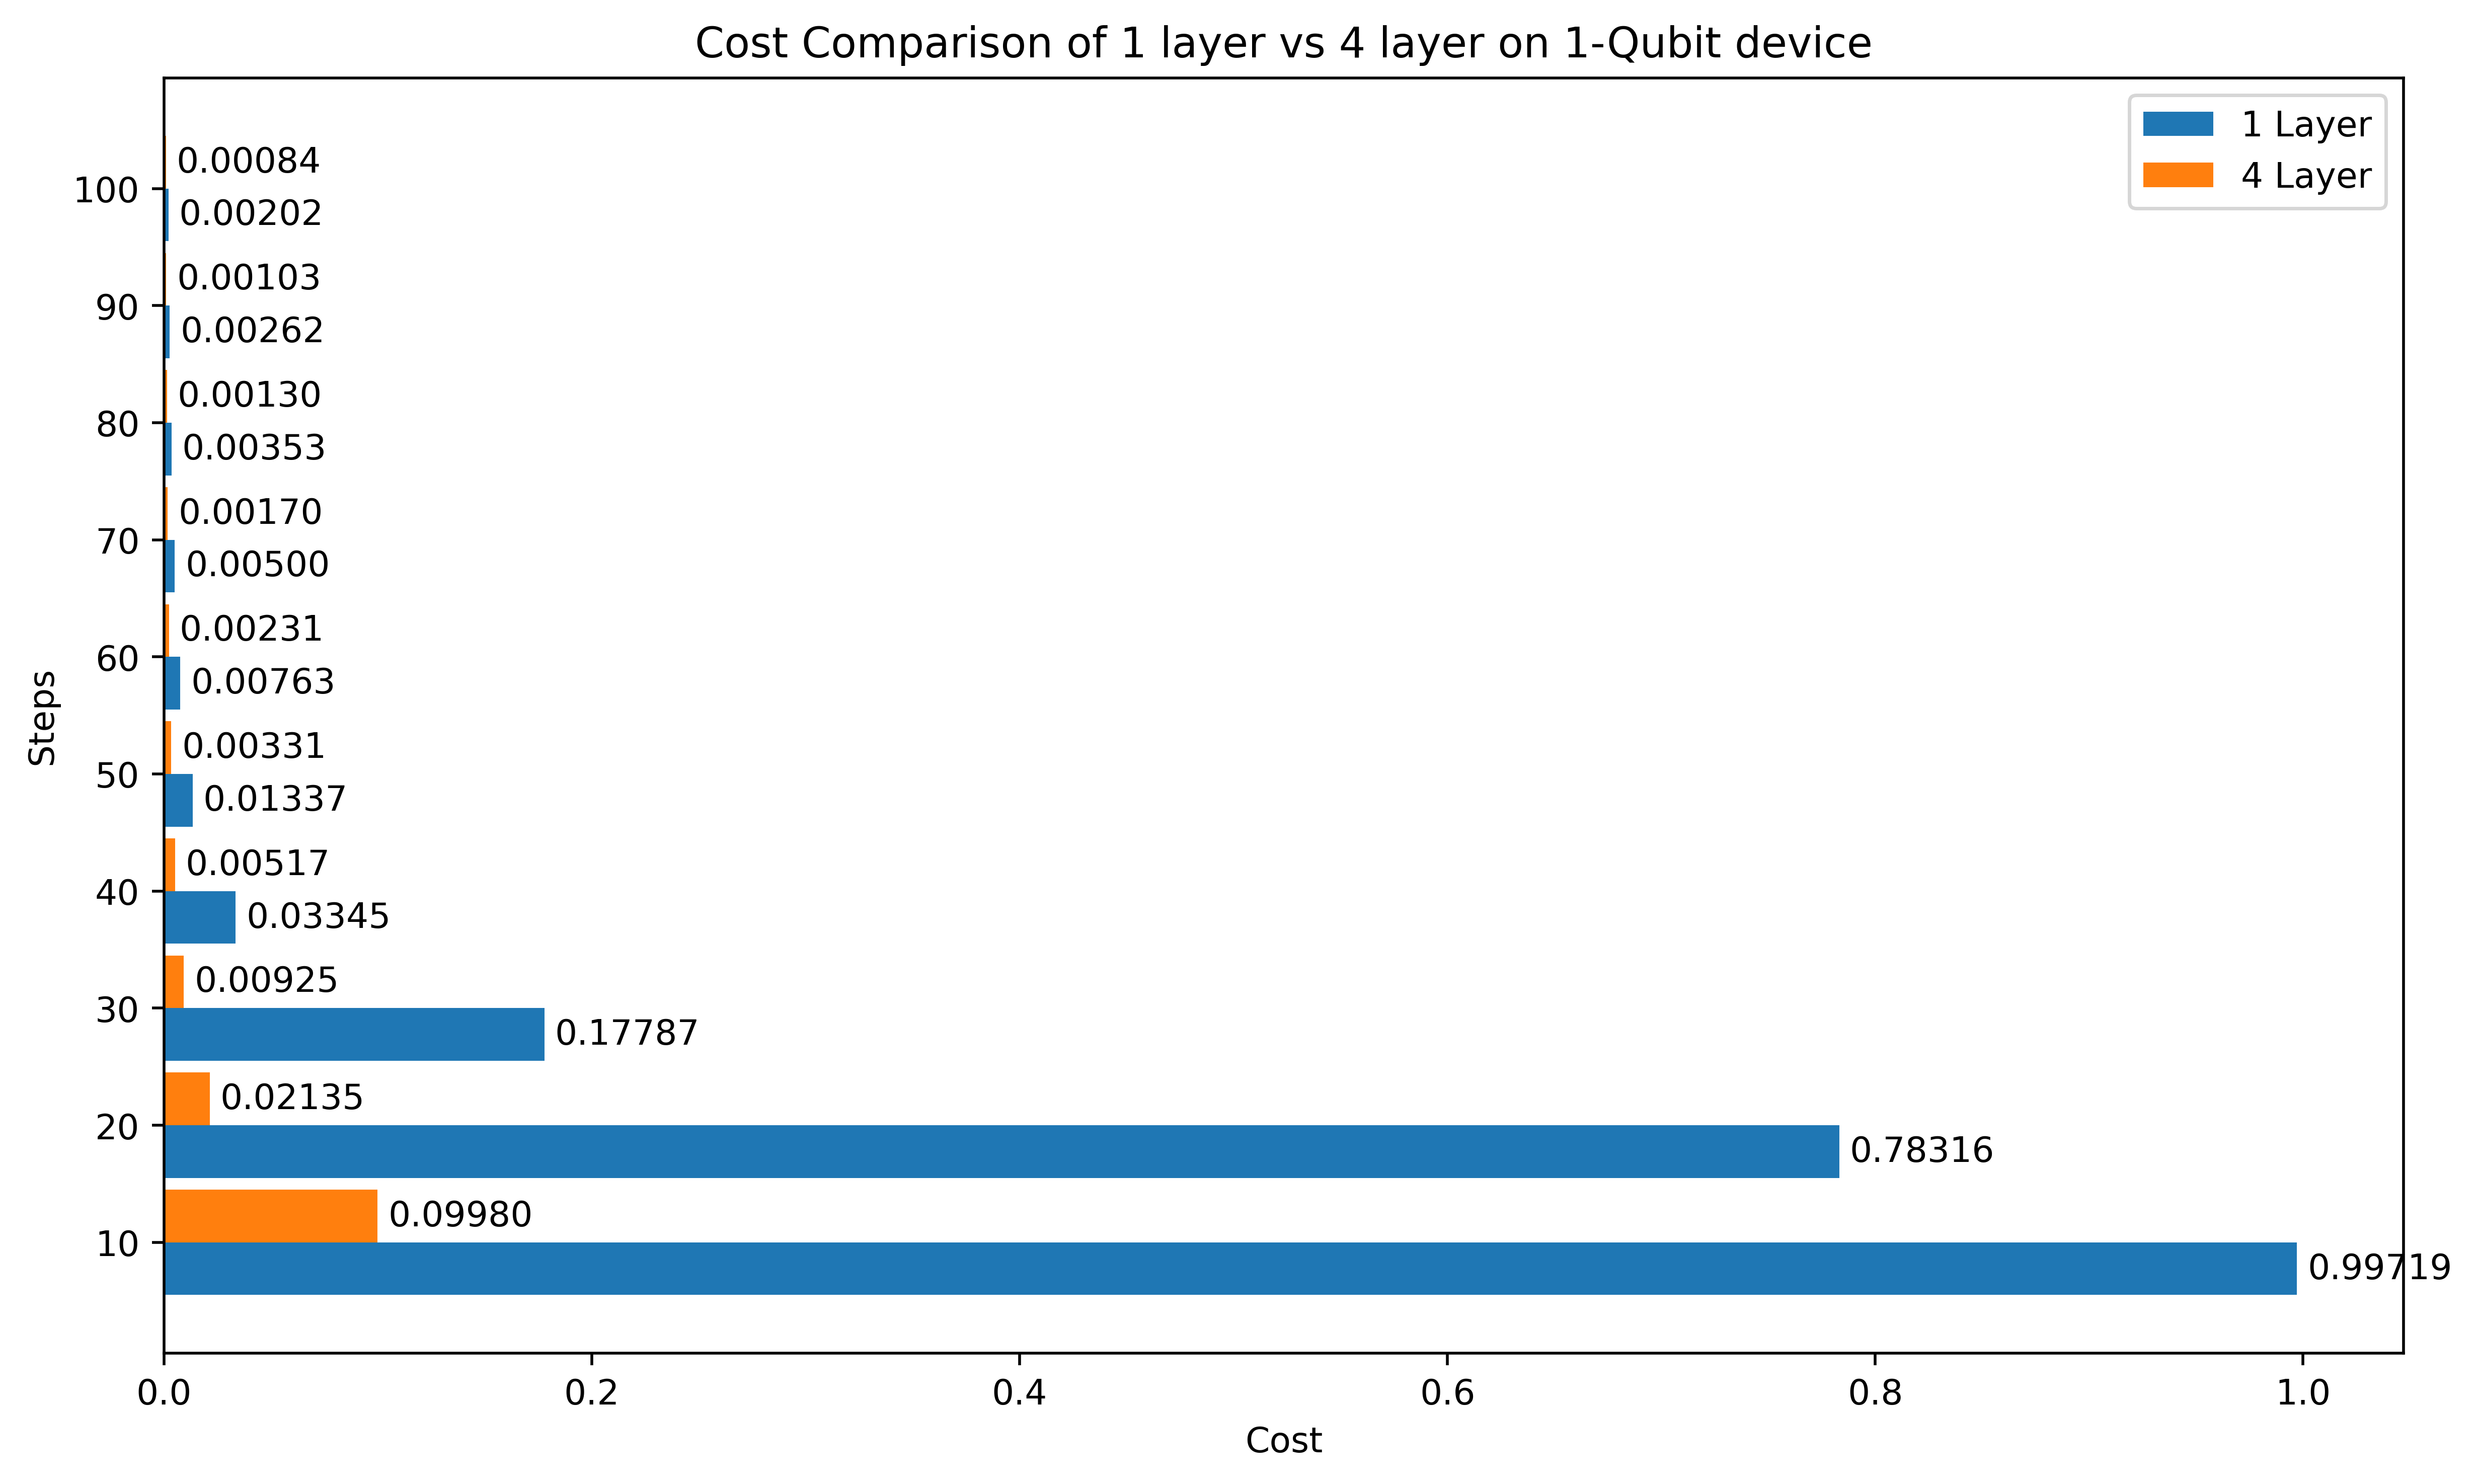

In [ ]:
labels = list(cost_1l.keys())
y = np.arange(len(labels))
height = 0.45

fig, ax = plt.subplots(figsize=(10, 6), dpi = 500)
bars1 = ax.barh(y - height/2, list(cost_1l.values()), height, label='1 Layer')
bars2 = ax.barh(y + height/2, list(cost_4l.values()), height, label='4 Layer')

ax.set_xlabel('Cost')
ax.set_ylabel('Steps')
ax.set_title('Cost Comparison of 1 layer vs 4 layer on 1-Qubit device')

ax.set_yticks(y)
ax.set_yticklabels(labels)

ax.legend()

# Function to add value labels
def autolabel(bars):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.5f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

**Important Takeway:**

Increased/more layers give the ability to access to more hilbert space. That's why significantly lower cost and lower error is found on 4 layer system.

# References

---
- [How to start learning quantum machine learning
 by Catalina Albornoz ](https://pennylane.ai/blog/2021/10/how-to-start-learning-quantum-machine-learning/)

- And her forum discussion [Variational Quantum Regressor in Pennylane](https://discuss.pennylane.ai/t/variational-quantum-regressor-in-pennylane/1515) and [Help with Regression Model Training](https://discuss.pennylane.ai/t/help-with-regression-model-training/4615/3)
- High expressability/more parameters give access to more Hilbert space -- [Expressibility and entangling capability of parameterized quantum circuits for hybrid quantum-classical algorithms](https://arxiv.org/abs/1905.10876)

**By -**

Name: Asadullah Bin Rahman

Email: [galib.cse.17020221@std.hstu.ac.bd](galib.cse.17020221@std.hstu.ac.bd) 

[Portfolio](https://asadullahgalib007.github.io/), [LinkedIn](https://www.linkedin.com/in/asadullah-bin-rahman/), [Google Scholar](https://scholar.google.com/citations?user=mhuUG2oAAAAJ&hl=en)